# SARIMA

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Source: Center for Disease Control (CDC) Open Data

covid = pd.read_csv('PH-COVID-UPDATED.csv', parse_dates = True)
covid['Date'] = pd.to_datetime(covid['Date'], format = '%m/%d/%Y')
covid.set_index('Date', inplace = True)
covid.index.freq = 'D'

In [3]:
# Specific Dates

filtered_dates = (covid.index >= '2020-03-06') & (covid.index <= '2021-03-22')
covid = covid.loc[filtered_dates]
covid

,Cases
Date,
2020-03-06,2
2020-03-07,1
2020-03-08,4
2020-03-09,10
2020-03-10,13
...,...
2021-03-18,5286
2021-03-19,7082
2021-03-20,7990


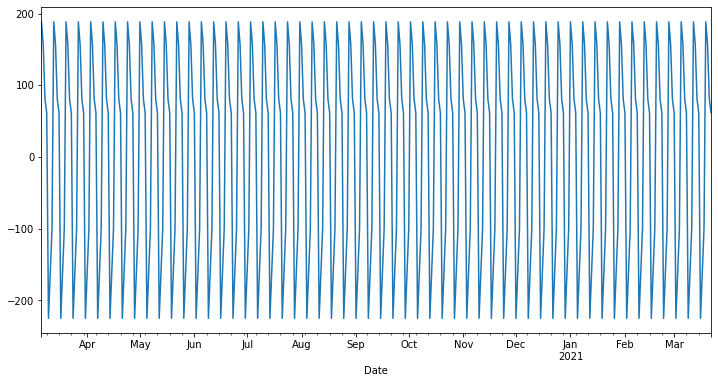

In [4]:
# SEASONAL ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(covid['Cases'], model = 'add')
result.seasonal.plot(figsize = (12,6)); # seasonal = 7

In [5]:
# Train, Test Split

train_data = covid.iloc[:280]
test_data = covid.iloc[280:]

In [8]:
# Grid Search
# !pip install pmdarima

from pmdarima.arima import auto_arima

results = auto_arima(covid['Cases'])
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  382
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -2956.287
Date:                Tue, 18 May 2021   AIC                           5924.575
Time:                        01:19:43   BIC                           5948.232
Sample:                             0   HQIC                          5933.961
                                - 382                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     47.7643     24.873      1.920      0.055      -0.987      96.515
ar.L1         -0.7920      0.060    -13.171      0.000      -0.910      -0.674
ma.L1          0.2403      0.070      3.430      0.001       0.103       0.378
ma.L2         -0.3291      0.050     -6.565      0.000      -0.427      -0.231
ma.L3         -0.1402      0.040     -3.489      0.000      -0.219      -0.061
sigma2      3.329e+05   1.48e+04     22.463      0.000    3.04e+05    3.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               355.47
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.01   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# Model

model = SARIMAX(covid['Cases'], order = (1,1,3), seasonal_order = (1,0,1,7))

In [23]:
# Fit Model

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

results = model.fit()

In [24]:
# Results Summary

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Cases   No. Observations:                  382
Model:             SARIMAX(1, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -2944.700
Date:                             Tue, 18 May 2021   AIC                           5903.401
Time:                                     01:27:20   BIC                           5931.000
Sample:                                 03-06-2020   HQIC                          5914.351
                                      - 03-22-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8446      0.049    -17.270      0.000      -0.940      -0.749
ma.L1          0.2451      0.059      4.165      0.000       0.130       0.360
ma.L2         -0.3511      0.048     -7.250      0.000      -0.446      -0.256
ma.L3         -0.0729      0.038     -1.914      0.056      -0.148       0.002
ar.S.L7        0.9784      0.047     20.941      0.000       0.887       1.070
ma.S.L7       -0.9102      0.067    -13.496      0.000      -1.042      -0.778
sigma2      2.996e+05   1.23e+04     24.444      0.000    2.76e+05    3.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               507.95
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               3.09   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
# Predictions

start = len(train_data)
end = len(train_data) + len(test_data) - 1

predictions = results.predict(start = start, end = end, typ = 'level').rename('SARIMA (1,1,3), (1,0,1,7) Predictions')

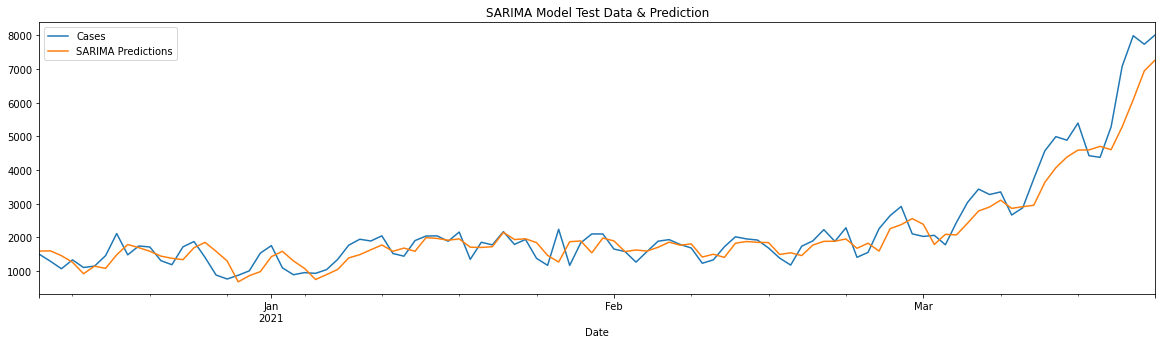

In [26]:
# Plot the Model Fit (Test vs Predictions)

test_data['Cases'].plot(legend = True, figsize = (20,5), title = 'SARIMA Model Test Data & Prediction')
predictions.plot(legend = True, label = 'SARIMA Predictions')

In [31]:
# Forecast into Unknown Future
# SARIMA Model

# Model

model = SARIMAX(covid['Cases'], order = (1,1,3), seasonal_order = (1,0,1,7))
results = model.fit()

forecast = results.predict(start = len(covid), end = len(covid) + 18, typ = 'levels').rename('SARIMA (1,1,3), (1,0,1,7) FORECAST')
forecast

2021-03-23    7218.289341
2021-03-24    7351.540293
2021-03-25    7484.416527
2021-03-26    7977.038335
2021-03-27    7999.788911
2021-03-28    7957.351617
2021-03-29    7930.080654
2021-03-30    7615.189628
2021-03-31    7640.854375
2021-04-01    7908.786587
2021-04-02    8274.293239
2021-04-03    8394.935232
2021-04-04    8270.321922
2021-04-05    8313.816778
2021-04-06    7946.449189
2021-04-07    8021.618764
2021-04-08    8241.491872
2021-04-09    8634.820099
2021-04-10    8722.701437
Freq: D, Name: SARIMA (1,1,3), (1,0,1,7) FORECAST, dtype: float64

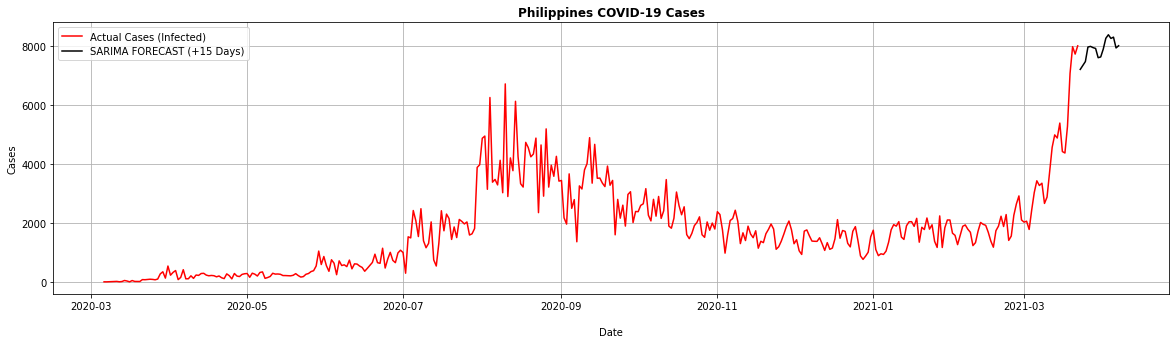

In [29]:
# PLOT SARIMA

plt.figure(figsize = (20,5))
plt.plot(covid['Cases'], color = 'r', label = 'Actual Cases (Infected)')
plt.plot(forecast, color = 'k', label = 'SARIMA FORECAST (+15 Days)')
plt.title('Philippines COVID-19 Cases', fontweight = 'bold')
plt.xlabel('\nDate')
plt.ylabel('Cases')
plt.grid(True)
plt.legend()
plt.show()